# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_train_image.shape

(60000, 28, 28)

In [4]:
#指定測試集與訓練資料集
#將每張圖28x28 pixel 轉成一維 784x1
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#宣告採用序列模型
model = Sequential()

In [9]:
#建構輸入層
#輸出256, 輸入784(pixel), kernel_initialzer(weight 初始化的選擇), 激活函數
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
#loss可以依照分類或回歸選擇 (MSE, MAE...)
#optimizer決定梯度下降優化的方法(常見有SGD, Adagrad, Adam, RMSprop)
#metrics判斷結果好壞的方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

### Fit
- x 訓練Data
- y 訓練label
- batch_size 每次梯度下降的Data數量 Default:32
- epochs 訓練迭代輪次
- verbose紀錄 0無 1進度條 2每輪一行
- validation_split 驗證集的比例
- validation_data 驗證集(會覆蓋split比例)
- shuffle 對batch裡面資料進行洗牌

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 232us/step - loss: 0.2698 - acc: 0.9222 - val_loss: 0.1329 - val_acc: 0.9611
Epoch 2/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.1080 - acc: 0.9680 - val_loss: 0.1036 - val_acc: 0.9698
Epoch 3/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.0710 - acc: 0.9782 - val_loss: 0.0946 - val_acc: 0.9718
Epoch 4/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.0508 - acc: 0.9842 - val_loss: 0.0799 - val_acc: 0.9756
Epoch 5/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.0369 - acc: 0.9883 - val_loss: 0.0833 - val_acc: 0.9735
Epoch 6/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.0259 - acc: 0.9919 - val_loss: 0.0750 - val_acc: 0.9782
Epoch 7/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.0194 - acc: 0.9943 - val_loss: 0.0907 -

# 以圖形顯示訓練過程

In [14]:
#訓練過程資料都存放在train_history.history裡面
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

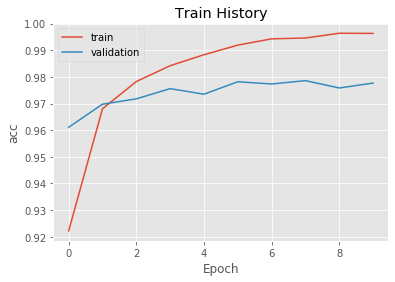

In [15]:
show_train_history(train_history,'acc','val_acc')

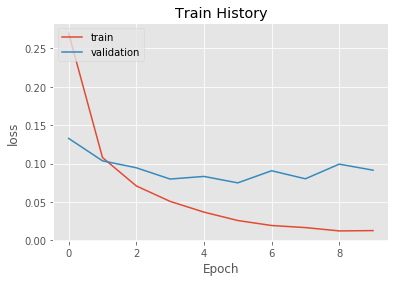

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
#scores[0] 是loss
#scores[1] 是評估metrics的值

scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 40us/step

accuracy= 0.9762


# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [18]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [19]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [20]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [21]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [22]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
#建立模型
model_2_layers = Sequential()
model_2_layers.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model_2_layers.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model_2_layers.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [25]:
print(model_2_layers.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model_3_layers = Sequential()
model_3_layers.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model_3_layers.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model_3_layers.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model_3_layers.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [27]:
print(model_3_layers.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [28]:
model_2_layers.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [29]:
train_history_2_layers =model_2_layers.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.2402 - acc: 0.9294 - val_loss: 0.1061 - val_acc: 0.9680
Epoch 2/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.0946 - acc: 0.9700 - val_loss: 0.0918 - val_acc: 0.9709
Epoch 3/10
48000/48000 [==============================] - 6s 127us/step - loss: 0.0630 - acc: 0.9802 - val_loss: 0.0901 - val_acc: 0.9723
Epoch 4/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.0469 - acc: 0.9848 - val_loss: 0.0979 - val_acc: 0.9707
Epoch 5/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.0372 - acc: 0.9883 - val_loss: 0.0977 - val_acc: 0.9733
Epoch 6/10
48000/48000 [==============================] - 6s 125us/step - loss: 0.0293 - acc: 0.9906 - val_loss: 0.1069 - val_acc: 0.9739
Epoch 7/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.0259 - acc: 0.9917 - val_loss: 0.0992 - 

In [30]:
model_3_layers.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [31]:
train_history_3_layers =model_3_layers.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.2377 - acc: 0.9276 - val_loss: 0.1712 - val_acc: 0.9471
Epoch 2/10
48000/48000 [==============================] - 7s 146us/step - loss: 0.0989 - acc: 0.9697 - val_loss: 0.1573 - val_acc: 0.9554
Epoch 3/10
48000/48000 [==============================] - 7s 143us/step - loss: 0.0699 - acc: 0.9786 - val_loss: 0.1144 - val_acc: 0.9659
Epoch 4/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.0546 - acc: 0.9833 - val_loss: 0.0889 - val_acc: 0.9745
Epoch 5/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.0443 - acc: 0.9860 - val_loss: 0.1057 - val_acc: 0.9728
Epoch 6/10
48000/48000 [==============================] - 7s 152us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.1078 - val_acc: 0.9717
Epoch 7/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0305 - acc: 0.9902 - val_loss: 0.1052 - 

# 以圖形顯示訓練過程

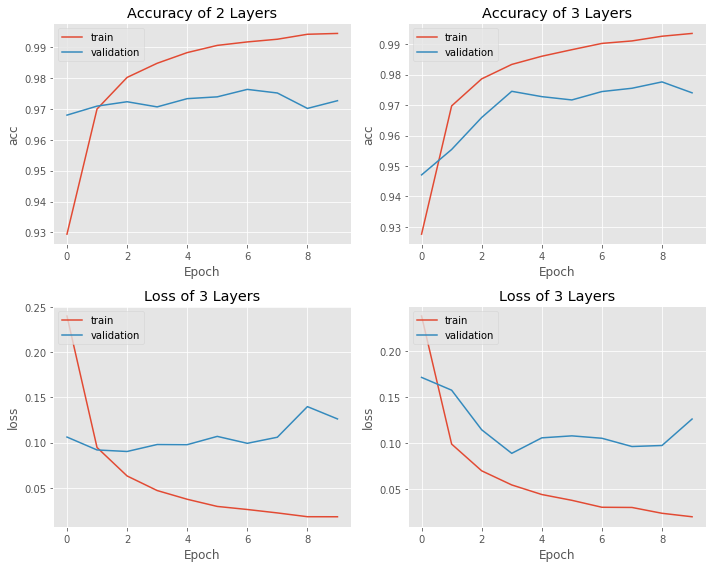

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'



plt.subplot(2,2,1)
plt.plot(train_history_2_layers.history['acc'])
plt.plot(train_history_2_layers.history['val_acc'])
plt.title('Accuracy of 2 Layers')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')


plt.subplot(2,2,2)
plt.plot(train_history_3_layers.history['acc'])
plt.plot(train_history_3_layers.history['val_acc'])
plt.title('Accuracy of 3 Layers')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')



plt.subplot(2,2,3)
plt.plot(train_history_2_layers.history['loss'])
plt.plot(train_history_2_layers.history['val_loss'])
plt.title('Loss of 3 Layers')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')



plt.subplot(2,2,4)
plt.plot(train_history_3_layers.history['loss'])
plt.plot(train_history_3_layers.history['val_loss'])
plt.title('Loss of 3 Layers')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.tight_layout()
plt.show()

# 評估模型準確率

In [33]:
#scores[0] 是loss
#scores[1] 是評估metrics的值

scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('1_Layers Accuracy=',scores[1])

10000/10000 [==============================] - 0s 42us/step

1_Layers Accuracy= 0.9762


In [34]:
scores_2_layers = model_2_layers.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('2_Layers Accuracy=',scores_2_layers[1])

10000/10000 [==============================] - 0s 41us/step

2_Layers Accuracy= 0.9746


In [35]:
scores_3_layers = model_3_layers.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('3_Layers Accuracy=',scores_3_layers[1])

10000/10000 [==============================] - 0s 43us/step

3_Layers Accuracy= 0.9754
